<a href="https://colab.research.google.com/github/tanoManzo/mimic_trajectories/blob/dev/MIMIC_TRAJECTORY_embeddings_04_01_collect_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection, Embeddings and Attitude

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
notes_path = "/content/drive/MyDrive/NIH/Data/"

In [4]:
file_name = "ICUSTAYS.csv"
df_ward = pd.read_csv(notes_path+file_name)
subject_id_tsicu = df_ward[(df_ward['FIRST_CAREUNIT']=='TSICU') & (df_ward['LAST_CAREUNIT']=='TSICU')].SUBJECT_ID.unique()
print(f'Number of Subjects in TSICU: {len(subject_id_tsicu)}')

Number of Subjects in TSICU: 5418


In [5]:
file_name = "DIAGNOSES_ICD.csv"
df_icd = pd.read_csv(notes_path+file_name)
df_icd_first = df_icd[df_icd['SEQ_NUM']==1]
df_icd_first_tsicu = df_icd_first[df_icd_first['SUBJECT_ID'].isin(subject_id_tsicu)]
print(f'Number of unique ICD 9 first sequence from TCICU subject: {df_icd_first_tsicu.ICD9_CODE.nunique()}')
icd_tsicu = df_icd_first_tsicu.ICD9_CODE.value_counts().nlargest(5)
print('Top 5 Popular ICD9 in the TSICU population with duplicates:')
print("code  #subjects")
icd_tsicu

Number of unique ICD 9 first sequence from TCICU subject: 1387
Top 5 Popular ICD9 in the TSICU population with duplicates:
code  #subjects


431      190
0389     164
85221    103
51881     81
430       79
Name: ICD9_CODE, dtype: int64

In [71]:
condition = []
for item in df_icd['ICD9_CODE'].values:
  
  if str(item).isdigit():
    item = float(item)
    if (item>799 and item<1000):
      condition.append(True)
    else: 
      condition.append(False)
  else:
      condition.append(False)

df_8xx = df_icd[condition]
df_8xx_tsicu = df_8xx[df_8xx['SUBJECT_ID'].isin(subject_id_tsicu)]
icd8xx_subjects_ids = df_8xx_tsicu['SUBJECT_ID'].unique()
print(f'Number of subjects with a first sequence ICD 9 code [800,900) : {len(icd8xx_subjects_ids)}')

Number of subjects with a first sequence ICD 9 code [800,900) : 272


In [75]:
print(df_8xx_tsicu['ICD9_CODE'].unique())

['920' '00845' '938' '936' '0940' '932' '0971' '0993' '937' '00841']


In [76]:
icd8xx_subjects_ids

array([  778,  1158,  1258,  2830,  2934,  1602,  2144,  2589,  4579,
        4687,  5204,  4787,  5260,  2265,  2397,  1860,  4916,  7024,
        4272,  6780,  4306,  4655,  4659,  4097,  5909,  6066,  8359,
        5835,  6131,  6973,  5362,  6214,  7637,  7235,  7475,  8655,
        8094,  9437, 10381,  9897, 10434,  9984, 12281, 11776,  9763,
       13440, 11382, 12653, 15770, 13259, 13249, 13391, 13584, 12623,
       13167, 12483, 12943, 14314, 15407, 14970, 17125, 16986, 14754,
       14332, 14903, 16946, 16912, 16792, 17610, 16200, 17330, 16757,
       18982, 18460, 19059, 18036, 17959, 19133, 21068, 20832, 21273,
       17835, 20190, 19533, 24253, 24285, 21413, 21429, 23054, 22026,
       21706, 23983, 24481, 24601, 23150, 23632, 24622, 23432, 23476,
       26161, 25274, 25175, 23373, 25225, 26130, 26395, 25259, 26274,
       27910, 27933, 26868, 27392, 27790, 27947, 29291, 26942, 29374,
       26579, 29035, 26492, 28193, 28013, 28868, 28744, 28162, 28170,
       30638, 30121,

In [7]:
patients = "PATIENTS.csv"
df_patients = pd.read_csv(notes_path+patients)
df_patients_icd8xx_tsicu = df_patients[df_patients['SUBJECT_ID'].isin(icd8xx_subjects_ids)]

print('Subjects Expired (1), Alive (0): ')
print(df_patients_icd8xx_tsicu['EXPIRE_FLAG'].value_counts())
print(df_patients_icd8xx_tsicu['GENDER'].value_counts())

Subjects Expired (1), Alive (0): 
0    159
1    113
Name: EXPIRE_FLAG, dtype: int64
M    153
F    119
Name: GENDER, dtype: int64


In [9]:
gcs_total = "NOTES_NURSING_TRAJECTORIES_TSICU_GCS_TOTAL.csv"
df_gcs_total = pd.read_csv(notes_path+gcs_total)
df_gcs_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14138 entries, 0 to 14137
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ROW_ID        14138 non-null  int64  
 1   SUBJECT_ID    14138 non-null  int64  
 2   HADM_ID       14138 non-null  int64  
 3   ICUSTAY_ID    14138 non-null  float64
 4   ITEMID        14138 non-null  int64  
 5   CHARTTIME     14138 non-null  object 
 6   STORETIME     14138 non-null  object 
 7   CGID          14138 non-null  float64
 8   VALUE         14137 non-null  float64
 9   VALUENUM      14137 non-null  float64
 10  VALUEUOM      14138 non-null  object 
 11  WARNING       0 non-null      float64
 12  ERROR         0 non-null      float64
 13  RESULTSTATUS  0 non-null      float64
 14  STOPPED       14138 non-null  object 
dtypes: float64(7), int64(4), object(4)
memory usage: 1.6+ MB


In [11]:
df_gcs_total_subjects = df_gcs_total[df_gcs_total['SUBJECT_ID'].isin(icd8xx_subjects_ids)]
df_gcs_total_subjects['SUBJECT_ID'].nunique()

149

In [12]:
df_gcs_total_subjects.info()
df_gcs_total_subjects.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14138 entries, 0 to 14137
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ROW_ID        14138 non-null  int64  
 1   SUBJECT_ID    14138 non-null  int64  
 2   HADM_ID       14138 non-null  int64  
 3   ICUSTAY_ID    14138 non-null  float64
 4   ITEMID        14138 non-null  int64  
 5   CHARTTIME     14138 non-null  object 
 6   STORETIME     14138 non-null  object 
 7   CGID          14138 non-null  float64
 8   VALUE         14137 non-null  float64
 9   VALUENUM      14137 non-null  float64
 10  VALUEUOM      14138 non-null  object 
 11  WARNING       0 non-null      float64
 12  ERROR         0 non-null      float64
 13  RESULTSTATUS  0 non-null      float64
 14  STOPPED       14138 non-null  object 
dtypes: float64(7), int64(4), object(4)
memory usage: 1.7+ MB


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,38382037,778,132827,247130.0,198,2180-04-01 06:00:00,2180-04-01 06:25:00,21570.0,15.0,15.0,points,NaN,NaN,NaN,NotStopd


In [42]:
df_patients_icd8xx_tsicu_gcs_scores = df_gcs_total_subjects.groupby(['SUBJECT_ID', 'HADM_ID']).agg(
    MAX_SCORE=('VALUE', 'max'),
    MIN_SCORE=('VALUE', 'min'),
    DELTA_SCORE=('VALUE', lambda x: x.max() - x.min())
).reset_index()
df_patients_icd8xx_tsicu_gcs_scores.info()
df_patients_icd8xx_tsicu_gcs_scores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBJECT_ID   291 non-null    int64  
 1   HADM_ID      291 non-null    int64  
 2   MAX_SCORE    291 non-null    float64
 3   MIN_SCORE    291 non-null    float64
 4   DELTA_SCORE  291 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 11.5 KB


,SUBJECT_ID,HADM_ID,MAX_SCORE,MIN_SCORE,DELTA_SCORE
0,778,132827,15.0,15.0,0.0
1,1158,155719,15.0,8.0,7.0
2,1158,197072,15.0,3.0,12.0
3,1158,197763,14.0,6.0,8.0
4,1258,177293,14.0,8.0,6.0
...,...,...,...,...,...
286,32775,115046,15.0,15.0,0.0
287,32775,128184,15.0,3.0,12.0
288,32775,137148,15.0,15.0,0.0
289,32775,172084,15.0,15.0,0.0


In [14]:
PATH_TO_SAVE = "/content/drive/MyDrive/NIH/Data/"
name_file_to_save = 'NOTES_NURSING_TRAJECTORIES_TSICU_GCS_SUB_CG.csv'
df_patients_icd8xx_tsicu_gcs_scores.to_csv(PATH_TO_SAVE+name_file_to_save,index=False)

number of notes: min=0.0, max=12.0, mean=1.7975659229208925,  median=0.0


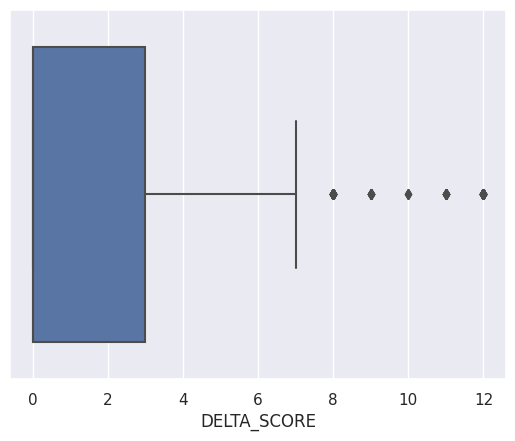

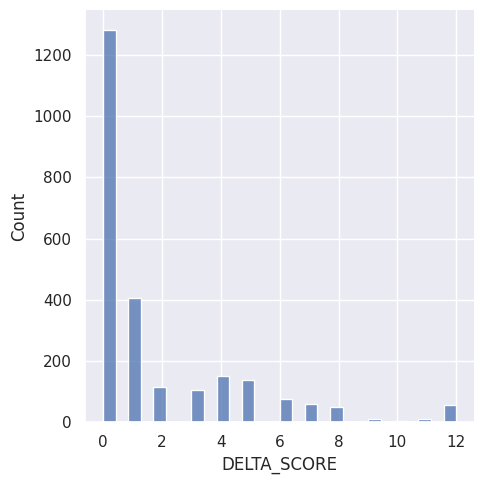

In [15]:
sns.set()

num_notes = df_patients_icd8xx_tsicu_gcs_scores['DELTA_SCORE']
#print(num_notes)
print(f'number of notes: min={num_notes.min()}, max={num_notes.max()}, mean={num_notes.mean()},  median={num_notes.median()}')
sns.boxplot(x=num_notes)
sns.displot(num_notes)

In [16]:
df_patients_icd8xx_tsicu_gcs_scores_subjects = df_patients_icd8xx_tsicu_gcs_scores.groupby(['SUBJECT_ID']).agg(
    MAX_SCORE=('MAX_SCORE', 'max'),
    MIN_SCORE=('MIN_SCORE', 'min'),
    CG_COUNT=('SUBJECT_ID', 'count')
).reset_index()
df_patients_icd8xx_tsicu_gcs_scores_subjects['DELTA_SCORE'] = df_patients_icd8xx_tsicu_gcs_scores_subjects['MAX_SCORE'] - df_patients_icd8xx_tsicu_gcs_scores_subjects['MIN_SCORE']

df_patients_icd8xx_tsicu_gcs_scores_subjects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBJECT_ID   149 non-null    int64  
 1   MAX_SCORE    149 non-null    float64
 2   MIN_SCORE    149 non-null    float64
 3   CG_COUNT     149 non-null    int64  
 4   DELTA_SCORE  149 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.9 KB


In [17]:
PATH_TO_SAVE = "/content/drive/MyDrive/NIH/Data/"
name_file_to_save = 'NOTES_NURSING_TRAJECTORIES_TSICU_GCS_SUB_ONLY.csv'
df_patients_icd8xx_tsicu_gcs_scores_subjects.to_csv(PATH_TO_SAVE+name_file_to_save,index=False)

In [45]:
note_events = "NOTEEVENTS.csv"
df_note_events = pd.read_csv(notes_path+note_events)
df_note_events.info()

<ipython-input-45-8fd00f55f791>:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_note_events = pd.read_csv(notes_path+note_events)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


In [80]:
df_notes_icd8xx_tsicu_gcs_scores = df_patients_icd8xx_tsicu_gcs_scores.merge(df_note_events, on=['SUBJECT_ID','HADM_ID'], how='inner')
df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores.merge(df_patients[['SUBJECT_ID', 'EXPIRE_FLAG']], on=['SUBJECT_ID'], how='inner')
df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores.merge(df_8xx_tsicu[['SUBJECT_ID', 'ICD9_CODE','HADM_ID']], on=['SUBJECT_ID','HADM_ID'], how='inner')
df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores[df_notes_icd8xx_tsicu_gcs_scores['CATEGORY']=='Nursing/other']
df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores[df_notes_icd8xx_tsicu_gcs_scores['DELTA_SCORE'] > 5.0]
df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores[df_notes_icd8xx_tsicu_gcs_scores['EXPIRE_FLAG'] == 1]
df_notes_icd8xx_tsicu_gcs_scores.info()
df_notes_icd8xx_tsicu_gcs_scores

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 15 to 5749
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBJECT_ID   1614 non-null   int64  
 1   HADM_ID      1614 non-null   int64  
 2   MAX_SCORE    1614 non-null   float64
 3   MIN_SCORE    1614 non-null   float64
 4   DELTA_SCORE  1614 non-null   float64
 5   ROW_ID       1614 non-null   int64  
 6   CHARTDATE    1614 non-null   object 
 7   CHARTTIME    1614 non-null   object 
 8   STORETIME    1614 non-null   object 
 9   CATEGORY     1614 non-null   object 
 10  DESCRIPTION  1614 non-null   object 
 11  CGID         1614 non-null   float64
 12  ISERROR      0 non-null      float64
 13  TEXT         1614 non-null   object 
 14  EXPIRE_FLAG  1614 non-null   int64  
 15  ICD9_CODE    1614 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory usage: 214.4+ KB


,SUBJECT_ID,HADM_ID,MAX_SCORE,MIN_SCORE,DELTA_SCORE,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,EXPIRE_FLAG,ICD9_CODE
15,1158,197072,15.0,3.0,12.0,1277408,2138-11-21,2138-11-21 18:07:00,2138-11-21 18:13:00,Nursing/other,Report,21319.0,NaN,Respiratory Care\nPatient has T tube in place ...,1,00845
16,1158,197072,15.0,3.0,12.0,1277409,2138-11-22,2138-11-22 05:43:00,2138-11-22 05:48:00,Nursing/other,Report,19050.0,NaN,condition updated\nVSS; slight discomfort from...,1,00845
17,1158,197072,15.0,3.0,12.0,1277401,2138-11-20,2138-11-20 04:45:00,2138-11-20 05:01:00,Nursing/other,Report,17706.0,NaN,data: admitted from [**Hospital **] hosp last ...,1,00845
18,1158,197072,15.0,3.0,12.0,1277402,2138-11-20,2138-11-20 05:20:00,2138-11-20 05:32:00,Nursing/other,Report,20111.0,NaN,Respiratory Therapy\nPt transfered from OSH fo...,1,00845
19,1158,197072,15.0,3.0,12.0,1277403,2138-11-20,2138-11-20 17:51:00,2138-11-20 18:31:00,Nursing/other,Report,17485.0,NaN,Post op systems review: please see careview fo...,1,00845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5745,32440,194352,13.0,6.0,7.0,1672920,2170-01-28,2170-01-28 18:15:00,2170-01-28 18:34:00,Nursing/other,Report,15900.0,NaN,NURSING NOTE\nPLEASE SEE CAREVUE FOR DETAILS\n...,1,920
5746,32440,194352,13.0,6.0,7.0,1672921,2170-01-29,2170-01-29 04:20:00,2170-01-29 04:28:00,Nursing/other,Report,14212.0,NaN,Update\nSee careview for details...\n\nNeuro: ...,1,920
5747,32440,194352,13.0,6.0,7.0,1672922,2170-01-29,2170-01-29 17:33:00,2170-01-29 17:51:00,Nursing/other,Report,21189.0,NaN,Focus: Status Update\nData:\nPt waxes and wane...,1,920
5748,32440,194352,13.0,6.0,7.0,1672900,2170-01-23,2170-01-23 04:19:00,2170-01-23 04:23:00,Nursing/other,Report,15807.0,NaN,Respiratory Care\nPt intubated on vent support...,1,920


In [77]:
PATH_TO_SAVE = "/content/drive/MyDrive/NIH/Data/"
name_file_to_save = 'NOTES_NURSING_TRAJECTORIES_TSICU_GCS_HADM.csv'
df_notes_icd8xx_tsicu_gcs_scores.to_csv(PATH_TO_SAVE+name_file_to_save,index=False)

In [ ]:
df_note_icd8xx_tsicu = df_note_events[df_note_events['SUBJECT_ID'].isin(icd8xx_subjects_ids)]
print(f'Number of total notes: {len(df_note_icd8xx_tsicu)}')
df_nursing_progress_note_icd8xx_tsicu = df_note_icd8xx_tsicu[df_note_icd8xx_tsicu['DESCRIPTION']=='Nursing Progress Note']
print(f'Number of Nursing Progress Notes: {len(df_nursing_progress_note_icd8xx_tsicu)}')
df_discharge_note_icd8xx_tsicu = df_note_icd8xx_tsicu[df_note_icd8xx_tsicu['CATEGORY']=='Discharge summary']
print(f'Number of Discharge summary: {len(df_discharge_note_icd8xx_tsicu)}')

In [ ]:
cgid_icd8xx_tsicu = df_nursing_progress_note_icd8xx_tsicu['CGID'].unique()
#print(f'Number of caregivers: {len(cgid_maxicu_tsicu)}')

In [ ]:
caregivers = "CAREGIVERS.csv"
df_caregivers = pd.read_csv(notes_path+caregivers)
df_caregivers[df_caregivers['CGID'].isin(cgid_icd8xx_tsicu)].LABEL.value_counts()

In [ ]:
name_file= "ADMISSIONS.csv"
df_adm = pd.read_csv(notes_path+name_file)
df_adm_icd8xx_tsicu = df_adm[df_adm['SUBJECT_ID'].isin(cgid_icd8xx_tsicu)]
df_adm_icd8xx_tsicu

Report

In [ ]:
print(f'Number of Subjects in TSICU: {len(subject_id_tsicu)}')
print(f'Number of subjects with a first sequence ICD 9 code [800,900) : {len(icd8xx_subjects_ids)}')
print('')
print('Subjects Expired (1), Alive (0): ')
print(df_patients_icd8xx_tsicu['EXPIRE_FLAG'].value_counts())
print('')
print('Gender:')
print(df_patients_icd8xx_tsicu['GENDER'].value_counts())
print('')
print(f'Number of total notes: {len(df_note_icd8xx_tsicu)}')
print(f'Number of Nursing Progress Notes: {len(df_nursing_progress_note_icd8xx_tsicu)}')
print(f'Number of Discharge summary: {len(df_discharge_note_icd8xx_tsicu)}')
print(f'Number of caregivers: {len(cgid_icd8xx_tsicu)}')

# END


In [ ]:
print(df_note_events['CATEGORY'].unique())

## **Data Preprocessing**

In [ ]:
df_note_events.info()

Grab tsicu notes, merge with ward and patients tables

In [ ]:
# get new type of notes (TSICU)
df_notes_TSICU = pd.DataFrame()
#df_notes_TSICU = df_notes.merge(df_note_events[['ROW_ID', 'CATEGORY']], on='ROW_ID')
df_notes_TSICU = df_note_events.merge(df_caregivers.drop('ROW_ID', axis=1), on='CGID')
#df_notes_TSICU = df_notes_TSICU.merge(df_ward.drop('ROW_ID', axis=1), on='SUBJECT_ID')
df_notes_TSICU = df_notes_TSICU.merge(df_patients.drop('ROW_ID', axis=1), on='SUBJECT_ID')
#df_notes_TSICU = df_notes_TSICU[(df_notes_TSICU['first_careunit'] == 'TSICU') & (df_notes_TSICU['last_careunit'] == 'TSICU')].drop_duplicates()
df_notes_TSICU.info()

In [ ]:
df_notes_TSICU.head(5)

Join with ICD

In [ ]:
icd = "DIAGNOSES_ICD.csv"
df_icd = pd.read_csv(notes_path+icd)
df_icd.columns = df_icd.columns.str.upper()
df_icd = df_icd.dropna(subset=['SEQ_NUM'])
df_icd['SEQ_NUM'] = df_icd['SEQ_NUM'].astype(int)
unique_values = df_icd['SEQ_NUM'].unique()
print("unique_values: ")
print(unique_values)
idx = df_icd.groupby(['HADM_ID', 'SUBJECT_ID'])['SEQ_NUM'].idxmin()
df_icd = df_icd.loc[idx]
df_icd.info()

In [ ]:
df_notes_TSICU = df_notes_TSICU.merge(df_icd[['HADM_ID','ICD9_CODE','SEQ_NUM', 'SUBJECT_ID']], on=['HADM_ID', 'SUBJECT_ID'])
df_notes_TSICU.info()

In [ ]:
df_notes_TSICU.head(20)

In [ ]:
grouping = df_notes_TSICU.groupby(['CGID','SUBJECT_ID']).size()
df_notes_TSICU['num_of_notes'] = df_notes_TSICU.set_index(['CGID','SUBJECT_ID']).index.map(grouping)
df_notes_TSICU_filtered = df_notes_TSICU[df_notes_TSICU['num_of_notes'] > 1]
df_notes_TSICU_filtered.info()

In [ ]:
df_notes_TSICU_filtered.head(10)

Filter by number of notes

In [ ]:
gb_notes = df_notes_TSICU_filtered.groupby(['ICD9_CODE'])
num_notes = gb_notes['TEXT'].count()

print(f'number of notes: min={num_notes.min()}, max={num_notes.max()}, mean={num_notes.mean()},  median={num_notes.median()}')
sns.boxplot(x=num_notes)
sns.displot(num_notes[((num_notes>2) & (num_notes<100))])

In [ ]:
df_notes_TSICU_filtered.info()

In [ ]:
icd9_grouping = df_notes_TSICU_filtered.groupby(['ICD9_CODE']).size()
df_notes_TSICU_filtered['num_of_conditions'] = df_notes_TSICU_filtered.set_index(['ICD9_CODE']).index.map(icd9_grouping)
#df_notes_TSICU_filtered = df_notes_TSICU_filtered[(df_notes_TSICU_filtered['num_of_conditions'] >= 15) & (df_notes_TSICU_filtered['num_of_conditions'] <= 1000)]
#df_notes_TSICU_filtered = df_notes_TSICU_filtered[(df_notes_TSICU_filtered['num_of_conditions'] >= 15) & (df_notes_TSICU_filtered['num_of_conditions'] <= 100)]
df_notes_TSICU_filtered.info()
print(icd9_grouping)

In [ ]:
df_notes_TSICU_dropped_cols = df_notes_TSICU_filtered.drop(['STORETIME','CHARTDATE','CHARTTIME','DOB','DOD','DOD_HOSP','DOD_SSN'], axis=1)
df_notes_TSICU_dropped_cols.columns

select emotional words then filter rows that dont have a minimum number of them

In [ ]:
def filter_for_emotional_words(df):
  selected_words = ['pain', 'family', 'stable', 'care', 'well', 'social', 'support', 'able', 'decreased', 'warm', 'unable', 'strong', 'intact', 'good', 'times', 'aware', 'eyes', 'tolerated', 'denies', 'tolerating', 'please', 'palpable']
  print("selected_words list length: ", len(selected_words))
  pattern = '|'.join(selected_words)
  new_df = df[df['TEXT'].str.contains(pattern, regex=True)].copy()
  #filtered_data = df_notes_TSICU[df_notes_TSICU['TEXT'].str.contains(pattern, regex=True)].copy()
  new_df['num_search_words'] = new_df['TEXT'].str.count(pattern)
  #new_df = new_df[new_df['num_search_words'] >= 0]
  new_df.info()
  return new_df

In [ ]:
#filtered_data = filter_for_emotional_words(df_notes_TSICU_dropped_cols)
filtered_data = df_notes_TSICU_dropped_cols

Random selection from sample set

In [ ]:
#random_filtered_data = filtered_data.sample(n=50000, random_state=42)
random_filtered_data = filtered_data

Remove similar sentences

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def remove_similar_notes(df):
  sentences = df['TEXT'].tolist()
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(sentences)
  similarity_threshold = 0.8

  similar_indices = []
  for i, sentence in enumerate(sentences):  # needs to be max 1000 entries
    if any(cosine_similarity(tfidf_matrix[i], tfidf_matrix[j])[0][0] > similarity_threshold for j in range(i)):  # very slow ~10 minutes for 1000 entries, exponential complexity (more than 5 hours if 6000 entries)
      similar_indices.append(i)
  index_labels = df.index[similar_indices]
  df.drop(index_labels, inplace=True)
  return df

Inverse Document Frequency

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_notes_TSICU['TEXT'])

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
word_score_dict = dict(zip(feature_names, tfidf_scores))

sorted_words = sorted(word_score_dict.items(), key=lambda x: x[1], reverse=True)

top_words = sorted_words[:50]

In [ ]:
print("Rank\tWord\t\t\tCount")
for rank, (word, score) in enumerate(top_words, start=1):
  print(f"{rank}\t{word.ljust(20)}\t{score}")

In [ ]:
#random_filtered_data = remove_similar_notes(random_filtered_data)
random_filtered_data.info()

Find matching conditions for both expired flags

In [ ]:
def split_set_half_expired(df):
  df['EXPIRE_FLAG'] = df['EXPIRE_FLAG'].astype(int)
  group_conditions = df.groupby(['ICD9_CODE', 'EXPIRE_FLAG'])
  def balance_conditions(g1,g2,size):
    size = min(len(g1), len(g2), size)
    return g1.sample(n=size, random_state=1), g2.sample(n=size, random_state=1)

  rows = []
  size = 50000

  for drg_desc, group in group_conditions:
    icd9, expire = drg_desc
    if (icd9, 1-expire) in group_conditions.groups:
      paired_group = group_conditions.get_group((icd9, 1-expire))
      group_sample1, group_sample2 = balance_conditions(group, paired_group, size)
      rows.append(group_sample1)
      rows.append(group_sample2)
      size -= len(group_sample1)
    if size <= 0:
      break

  new_df = pd.concat(rows)
  new_df = new_df.drop_duplicates()

  new_df.info()
  #print(new_df[['ICD9_CODE', 'EXPIRE_FLAG']])
  return new_df

  #valid_groups = [key for key, group in group_conditions.groups.keys() if (key[0], key[1], 1 - key[2]) in group_conditions.groups]
  #for key in valid_groups:
    #pass

In [ ]:
#balanced_data = split_set_half_expired(random_filtered_data)
balanced_data = random_filtered_data

Display notes

In [ ]:
pd.set_option('display.max_colwidth', 250)
pd.set_option('display.max_rows', None)
#print(balanced_data['TEXT'].head(200))
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

In [ ]:
print(balanced_data.columns)
print('\n'+"Number of rows: "+str(len(balanced_data)))

In [ ]:
balanced_data.info()

In [ ]:
no_duplicates = balanced_data.sort_values('ROW_ID').drop_duplicates(subset=['CGID', 'SUBJECT_ID'])  
no_duplicates = no_duplicates.drop(['TEXT'], axis=1)  # removes text notes
no_duplicates.info()

Save to CSV

In [ ]:
# path and name of the cvs file 
PATH_TO_SAVE = "/content/drive/MyDrive/NIH/Data/"
name_file_to_save = 'NOTES_NURSING_TRAJECTORIES_TSICU_COUNTS.csv'
no_duplicates.to_csv(PATH_TO_SAVE+name_file_to_save,index=False)

Gather- top ICD9, # of: patients, deceased, CGs, notes

In [ ]:
icd9_max_val = balanced_data['num_of_conditions'].max()
icd9_max_df = balanced_data[balanced_data['num_of_conditions'] == icd9_max_val]

print("Max ICD9 code: " + icd9_max_df['ICD9_CODE'].unique())
print("Number of patients: " + str(icd9_max_df['SUBJECT_ID'].nunique()))
print("Number of deceased patients: " + str((icd9_max_df.drop_duplicates(subset='SUBJECT_ID')['EXPIRE_FLAG'] == 1).sum()))
print("Number of caregivers: " + str(icd9_max_df['CGID'].nunique()))
unique_cgid = icd9_max_df['CGID'].unique()
unique_cgid_df = icd9_max_df[icd9_max_df['CGID'].isin(unique_cgid)].drop_duplicates(subset=['CGID', 'LABEL'])
unique_cgid_df['LABEL'] = unique_cgid_df['LABEL'].fillna('UNKNOWN')
unique_cgid_df['LABEL'] = unique_cgid_df['LABEL'].str.upper()
print("Caregiver labels: " + '\n' + str(unique_cgid_df['LABEL'].value_counts()))
print("Number of caregivers: " + str(icd9_max_df['CGID'].nunique()))
print("Number of notes: " + str(len(icd9_max_df)))

deceased patients for unfiltered set

In [ ]:
len(df_notes_TSICU['SUBJECT_ID'].unique())
deceased_TSICU = df_notes_TSICU[df_notes_TSICU['EXPIRE_FLAG'] == 1]
deceased_TSICU.info()

In [ ]:
sns.set()

gb_notes = deceased_TSICU.groupby(['CGID','SUBJECT_ID'])
num_notes = gb_notes['TEXT'].count()
print(num_notes)
print(f'number of notes: min={num_notes.min()}, max={num_notes.max()}, mean={num_notes.mean()},  median={num_notes.median()}')
sns.boxplot(x=num_notes)
sns.displot(num_notes[((num_notes>2) & (num_notes<15))])

Seperate deceased and living

In [ ]:
deceased_patients = balanced_data[balanced_data['EXPIRE_FLAG'] == 1]
deceased_patients.info()

In [ ]:
living_patients = balanced_data[balanced_data['EXPIRE_FLAG'] == 0]
living_patients.info()

Tokenized words

In [ ]:
#text = df_notes_TSICU['TEXT'].str.cat(sep=' ')
#words = nltk.word_tokenize(text)  # very slow

Count words in notes

In [ ]:
#stopwords = nltk.corpus.stopwords.words('english')
#words = [word.lower() for word in words if word.lower() not in stopwords and re.match(r'\b\w+\b', word)]  # also slow but only kinda slow
#word_counts = Counter(words)
#most_common_words = word_counts.most_common(300)

In [ ]:
#print("Rank\tWord\t\t\tCount")
#for rank, word_count in enumerate(most_common_words, start=1):
  #word, count = word_count
  #print(f"{rank}\t{word.ljust(20)}\t{count}")

Emotional words

In [ ]:
#emotional_words = []
#for word_count in most_common_words:
  #word = word_count[0]
  #synsets = wn.synsets(word)
  #if synsets:
    #senti_synset = swn.senti_synset(synsets[0].name())
    #if senti_synset.pos_score() > 0.45 or senti_synset.neg_score() > 0.45:
      #emotional_words.append(word)

#emotional_words

In [ ]:
#from textblob import TextBlob
#emotional_words = []
#for word_count in most_common_words:
  #word = word_count[0]
  #tb = TextBlob(word)
  #sentiment = tb.sentiment.polarity
  #if abs(sentiment) > 0.35:
    #emotional_words.append(word)

#emotional_words